# Text Mining 10K fillings to predict financial distress (EDF) (2012 - 2016)

## - Topic models using Latent Dirichlet Allocation (gensim)

In [2]:
import numpy as np
import pandas as pd
import re
from gensim.models import LdaModel, LdaMulticore
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords
import logging
import pickle
from gensim.test.utils import datapath
from gensim import *

In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

In [4]:
#import mycorpus
with open('mycorpus.pickle', 'rb') as f:
    mycorpus = pickle.load(f)

In [5]:
#import mydict
with open('mydict.pickle', 'rb') as handle:
    mydict = pickle.load(handle)

In [6]:
dict(list(mydict.items())[0:2])

{0: 'aarcorp', 1: 'abatement'}

In [ ]:
mycorpus[0:1]

### LDA Model -1 - Not well performance
 - The corpus was generated using stemming tokenization,  which gets us some inaccurate summarized topics.
 - I used 20 topics first, and there are some dupilicates topic accross topics, also the topic clusters seem not ideally. 

In [16]:
#train the LDA model - first trail
##the result is not ideal
lda_model = LdaMulticore(corpus=mycorpus,
                         id2word=mydict,
                         random_state=100,
                         num_topics=20,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)


2018-10-29 18:25:14,167 : INFO : using asymmetric alpha [0.12456869, 0.10180451, 0.08607485, 0.07455541, 0.06575534, 0.05881336, 0.053197186, 0.048560105, 0.044666618, 0.041351136, 0.038493842, 0.0360059, 0.03382003, 0.031884372, 0.030158294, 0.028609501, 0.027212018, 0.0259447, 0.024790173, 0.023734018]
2018-10-29 18:25:14,169 : INFO : using symmetric eta at 0.05
2018-10-29 18:25:14,257 : INFO : using serial LDA version on this node
2018-10-29 18:25:14,950 : INFO : running online LDA training, 20 topics, 10 passes over the supplied corpus of 11581 documents, updating every 3000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2018-10-29 18:25:14,961 : INFO : training LDA model using 3 processes
2018-10-29 18:25:15,128 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #1000/11581, outstanding queue size 1
2018-10-29 18:25:16,328 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #2000/11581, outstanding queue

2018-10-29 18:27:31,252 : INFO : PROGRESS: pass 1, dispatched chunk #7 = documents up to #8000/11581, outstanding queue size 8
2018-10-29 18:27:33,993 : INFO : PROGRESS: pass 1, dispatched chunk #8 = documents up to #9000/11581, outstanding queue size 9
2018-10-29 18:27:44,835 : INFO : PROGRESS: pass 1, dispatched chunk #9 = documents up to #10000/11581, outstanding queue size 9
2018-10-29 18:27:54,524 : INFO : PROGRESS: pass 1, dispatched chunk #10 = documents up to #11000/11581, outstanding queue size 9
2018-10-29 18:27:55,338 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-10-29 18:27:56,112 : INFO : topic #19 (0.024): 0.007*"oper" + 0.005*"result" + 0.004*"busi" + 0.003*"gener" + 0.003*"includ" + 0.003*"product" + 0.003*"compani" + 0.003*"financi" + 0.003*"market" + 0.002*"price"
2018-10-29 18:27:56,119 : INFO : topic #18 (0.025): 0.008*"oper" + 0.006*"servic" + 0.006*"bank" + 0.006*"loan" + 0.006*"includ" + 0.006*"requir" + 0.005*"busi" + 0.005*"r

2018-10-29 18:29:43,215 : INFO : PROGRESS: pass 2, dispatched chunk #10 = documents up to #11000/11581, outstanding queue size 8
2018-10-29 18:29:44,931 : INFO : PROGRESS: pass 2, dispatched chunk #11 = documents up to #11581/11581, outstanding queue size 9
2018-10-29 18:30:05,831 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-10-29 18:30:06,532 : INFO : topic #19 (0.024): 0.006*"oper" + 0.005*"result" + 0.004*"busi" + 0.003*"gener" + 0.003*"includ" + 0.003*"product" + 0.003*"compani" + 0.003*"financi" + 0.003*"market" + 0.002*"price"
2018-10-29 18:30:06,539 : INFO : topic #18 (0.025): 0.008*"oper" + 0.006*"servic" + 0.006*"includ" + 0.006*"requir" + 0.006*"rate" + 0.006*"util" + 0.005*"loan" + 0.005*"cost" + 0.005*"bank" + 0.005*"ga"
2018-10-29 18:30:06,545 : INFO : topic #2 (0.086): 0.011*"oper" + 0.010*"product" + 0.008*"compani" + 0.007*"result" + 0.007*"custom" + 0.006*"includ" + 0.006*"market" + 0.006*"busi" + 0.006*"servic" + 0.005*"financi"
20

2018-10-29 18:31:55,879 : INFO : topic #18 (0.025): 0.008*"oper" + 0.007*"util" + 0.007*"servic" + 0.006*"rate" + 0.006*"cost" + 0.006*"includ" + 0.006*"requir" + 0.006*"ga" + 0.006*"electr" + 0.005*"energi"
2018-10-29 18:31:55,888 : INFO : topic #2 (0.086): 0.011*"oper" + 0.011*"product" + 0.010*"compani" + 0.007*"custom" + 0.007*"result" + 0.006*"includ" + 0.006*"servic" + 0.006*"market" + 0.006*"busi" + 0.005*"vessel"
2018-10-29 18:31:55,896 : INFO : topic #1 (0.102): 0.014*"oper" + 0.011*"power" + 0.010*"cost" + 0.010*"gener" + 0.009*"result" + 0.008*"energi" + 0.008*"electr" + 0.008*"requir" + 0.006*"regul" + 0.006*"coal"
2018-10-29 18:31:55,908 : INFO : topic #0 (0.125): 0.026*"ga" + 0.019*"natur" + 0.018*"oil" + 0.013*"oper" + 0.008*"product" + 0.008*"drill" + 0.008*"pipelin" + 0.008*"regul" + 0.008*"price" + 0.007*"reserv"
2018-10-29 18:31:55,926 : INFO : topic diff=0.341350, rho=0.112808
2018-10-29 18:32:10,918 : INFO : merging changes from 2581 documents into a model of 11581

2018-10-29 18:33:44,641 : INFO : topic #1 (0.102): 0.015*"oper" + 0.012*"power" + 0.010*"gener" + 0.010*"cost" + 0.010*"energi" + 0.008*"result" + 0.008*"electr" + 0.008*"requir" + 0.007*"coal" + 0.006*"regul"
2018-10-29 18:33:44,647 : INFO : topic #0 (0.125): 0.023*"ga" + 0.017*"oil" + 0.017*"natur" + 0.015*"oper" + 0.009*"product" + 0.008*"regul" + 0.008*"price" + 0.008*"drill" + 0.007*"requir" + 0.007*"unit"
2018-10-29 18:33:44,662 : INFO : topic diff=0.474632, rho=0.112097
2018-10-29 18:33:52,252 : INFO : -7.134 per-word bound, 140.5 perplexity estimate based on a held-out corpus of 581 documents with 5453074 words
2018-10-29 18:33:52,258 : INFO : PROGRESS: pass 5, dispatched chunk #0 = documents up to #1000/11581, outstanding queue size 1
2018-10-29 18:33:52,836 : INFO : PROGRESS: pass 5, dispatched chunk #1 = documents up to #2000/11581, outstanding queue size 2
2018-10-29 18:33:52,838 : INFO : PROGRESS: pass 5, dispatched chunk #2 = documents up to #3000/11581, outstanding queue

2018-10-29 18:35:41,059 : INFO : PROGRESS: pass 6, dispatched chunk #8 = documents up to #9000/11581, outstanding queue size 9
2018-10-29 18:35:54,689 : INFO : PROGRESS: pass 6, dispatched chunk #9 = documents up to #10000/11581, outstanding queue size 9
2018-10-29 18:35:59,145 : INFO : PROGRESS: pass 6, dispatched chunk #10 = documents up to #11000/11581, outstanding queue size 9
2018-10-29 18:36:04,876 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-10-29 18:36:05,817 : INFO : topic #19 (0.024): 0.004*"oper" + 0.003*"result" + 0.003*"busi" + 0.002*"gener" + 0.002*"includ" + 0.002*"product" + 0.002*"compani" + 0.002*"financi" + 0.002*"market" + 0.002*"price"
2018-10-29 18:36:05,836 : INFO : topic #18 (0.025): 0.013*"util" + 0.011*"ga" + 0.009*"custom" + 0.009*"servic" + 0.009*"rate" + 0.008*"cost" + 0.008*"electr" + 0.008*"oper" + 0.007*"energi" + 0.006*"natur"
2018-10-29 18:36:05,843 : INFO : topic #2 (0.086): 0.018*"compani" + 0.014*"product" + 0.01

2018-10-29 18:37:28,358 : INFO : PROGRESS: pass 7, dispatched chunk #11 = documents up to #11581/11581, outstanding queue size 9
2018-10-29 18:37:48,186 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-10-29 18:37:48,886 : INFO : topic #19 (0.024): 0.003*"oper" + 0.002*"result" + 0.002*"busi" + 0.002*"gener" + 0.002*"includ" + 0.002*"product" + 0.002*"compani" + 0.002*"financi" + 0.001*"market" + 0.001*"price"
2018-10-29 18:37:48,896 : INFO : topic #18 (0.025): 0.014*"util" + 0.014*"ga" + 0.011*"custom" + 0.010*"servic" + 0.010*"rate" + 0.009*"cost" + 0.008*"electr" + 0.008*"energi" + 0.008*"oper" + 0.008*"natur"
2018-10-29 18:37:48,902 : INFO : topic #2 (0.086): 0.021*"compani" + 0.017*"product" + 0.012*"oper" + 0.008*"custom" + 0.008*"vessel" + 0.007*"company" + 0.007*"servic" + 0.007*"includ" + 0.007*"market" + 0.006*"segment"
2018-10-29 18:37:48,909 : INFO : topic #1 (0.102): 0.016*"oper" + 0.011*"cost" + 0.010*"gener" + 0.010*"power" + 0.010*"ener

2018-10-29 18:39:47,337 : INFO : topic #18 (0.025): 0.016*"ga" + 0.015*"util" + 0.012*"custom" + 0.011*"servic" + 0.011*"rate" + 0.010*"cost" + 0.009*"natur" + 0.009*"electr" + 0.008*"energi" + 0.008*"oper"
2018-10-29 18:39:47,352 : INFO : topic #2 (0.086): 0.023*"compani" + 0.019*"product" + 0.012*"oper" + 0.009*"custom" + 0.008*"company" + 0.007*"manufactur" + 0.007*"servic" + 0.007*"includ" + 0.007*"market" + 0.007*"vessel"
2018-10-29 18:39:47,375 : INFO : topic #1 (0.102): 0.016*"oper" + 0.011*"cost" + 0.010*"gener" + 0.010*"power" + 0.010*"energi" + 0.009*"result" + 0.008*"requir" + 0.007*"electr" + 0.007*"facil" + 0.007*"includ"
2018-10-29 18:39:47,382 : INFO : topic #0 (0.125): 0.020*"ga" + 0.016*"oper" + 0.015*"oil" + 0.014*"natur" + 0.009*"product" + 0.008*"price" + 0.008*"result" + 0.008*"regul" + 0.008*"requir" + 0.007*"drill"
2018-10-29 18:39:47,405 : INFO : topic diff=0.396842, rho=0.109382
2018-10-29 18:40:01,480 : INFO : merging changes from 2581 documents into a model 

2018-10-29 18:41:45,804 : INFO : topic #1 (0.102): 0.016*"oper" + 0.011*"power" + 0.010*"cost" + 0.010*"gener" + 0.010*"energi" + 0.009*"result" + 0.008*"requir" + 0.007*"electr" + 0.007*"facil" + 0.007*"project"
2018-10-29 18:41:45,810 : INFO : topic #0 (0.125): 0.018*"ga" + 0.017*"oper" + 0.015*"oil" + 0.014*"natur" + 0.009*"product" + 0.008*"result" + 0.008*"price" + 0.008*"regul" + 0.008*"requir" + 0.007*"unit"
2018-10-29 18:41:45,824 : INFO : topic diff=0.305834, rho=0.108734
2018-10-29 18:41:53,325 : INFO : -7.087 per-word bound, 135.9 perplexity estimate based on a held-out corpus of 581 documents with 5453074 words


In [ ]:
# save the model
lda_model.save('lda_model.model')

In [21]:
# See the topics
lda_model.print_topics(-1)
#The lda_model.print_topics shows what words contributed to which of the 20 topics, \
#along with the weightage of the word’s contribution to that topic.

2018-10-30 14:47:24,241 : INFO : topic #0 (0.125): 0.018*"ga" + 0.017*"oper" + 0.015*"oil" + 0.014*"natur" + 0.009*"product" + 0.008*"result" + 0.008*"price" + 0.008*"regul" + 0.008*"requir" + 0.007*"unit"
2018-10-30 14:47:24,252 : INFO : topic #1 (0.102): 0.016*"oper" + 0.011*"power" + 0.010*"cost" + 0.010*"gener" + 0.010*"energi" + 0.009*"result" + 0.008*"requir" + 0.007*"electr" + 0.007*"facil" + 0.007*"project"
2018-10-30 14:47:24,258 : INFO : topic #2 (0.086): 0.024*"compani" + 0.020*"product" + 0.012*"oper" + 0.010*"custom" + 0.008*"manufactur" + 0.008*"company" + 0.007*"market" + 0.007*"includ" + 0.007*"servic" + 0.007*"segment"
2018-10-30 14:47:24,265 : INFO : topic #3 (0.075): 0.001*"oper" + 0.001*"busi" + 0.001*"servic" + 0.001*"result" + 0.001*"product" + 0.000*"includ" + 0.000*"custom" + 0.000*"financi" + 0.000*"cost" + 0.000*"market"
2018-10-30 14:47:24,274 : INFO : topic #4 (0.066): 0.011*"defianc" + 0.002*"result" + 0.002*"financi" + 0.002*"oper" + 0.002*"compani" + 0.0

[(0,
  '0.018*"ga" + 0.017*"oper" + 0.015*"oil" + 0.014*"natur" + 0.009*"product" + 0.008*"result" + 0.008*"price" + 0.008*"regul" + 0.008*"requir" + 0.007*"unit"'),
 (1,
  '0.016*"oper" + 0.011*"power" + 0.010*"cost" + 0.010*"gener" + 0.010*"energi" + 0.009*"result" + 0.008*"requir" + 0.007*"electr" + 0.007*"facil" + 0.007*"project"'),
 (2,
  '0.024*"compani" + 0.020*"product" + 0.012*"oper" + 0.010*"custom" + 0.008*"manufactur" + 0.008*"company\x92" + 0.007*"market" + 0.007*"includ" + 0.007*"servic" + 0.007*"segment"'),
 (3,
  '0.001*"oper" + 0.001*"busi" + 0.001*"servic" + 0.001*"result" + 0.001*"product" + 0.000*"includ" + 0.000*"custom" + 0.000*"financi" + 0.000*"cost" + 0.000*"market"'),
 (4,
  '0.011*"defianc" + 0.002*"result" + 0.002*"financi" + 0.002*"oper" + 0.002*"compani" + 0.002*"product" + 0.002*"includ" + 0.002*"market" + 0.002*"loan" + 0.002*"advers"'),
 (5,
  '0.017*"program" + 0.016*"advertis" + 0.016*"network" + 0.014*"fcc" + 0.014*"televis" + 0.013*"station" + 0.010

### LDA Model -2 - Better performance
 - I used lemmatization for tokenization, which differentiates the characteristic of words, and provides more accurate clusters.
 - By toning parameters, the result got better, such as changed topics to 15, chunksize to 3000, and iterations to 300

In [9]:
#train the LDA model - 2nd trail
#the result is getting better, with 15 topics
lda_model = LdaModel(corpus=mycorpus,
                             id2word=mydict,
                             random_state=100,
                             num_topics=15,
                             passes=20,
                             chunksize=3000,
                             alpha='asymmetric',
                             decay=0.5,
                             offset=64,
                             eta=None,
                             eval_every=0,
                             iterations=300,
                             gamma_threshold=0.001,
                             per_word_topics=True)


2018-11-17 19:45:59,763 : INFO : using asymmetric alpha [0.15263604, 0.121313125, 0.10065699, 0.08601167, 0.07508676, 0.06662436, 0.05987621, 0.05436933, 0.04979008, 0.045922287, 0.04261209, 0.039747022, 0.037242956, 0.035035703, 0.03307544]
2018-11-17 19:45:59,765 : INFO : using symmetric eta at 0.06666666666666667
2018-11-17 19:45:59,788 : INFO : using serial LDA version on this node
2018-11-17 19:46:00,040 : INFO : running online (multi-pass) LDA training, 15 topics, 20 passes over the supplied corpus of 11581 documents, updating model once every 3000 documents, evaluating perplexity every 0 documents, iterating 300x with a convergence threshold of 0.001000
2018-11-17 19:46:00,043 : INFO : PROGRESS: pass 0, at document #3000/11581
2018-11-17 19:46:48,876 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 19:46:49,010 : INFO : topic #14 (0.033): 0.005*"impact" + 0.005*"rate" + 0.005*"certain" + 0.005*"regulation" + 0.005*"adversely" + 0.005*"price

2018-11-17 19:49:48,506 : INFO : topic #1 (0.121): 0.009*"bank" + 0.008*"loan" + 0.008*"capital" + 0.007*"oil" + 0.007*"reserve" + 0.007*"gas" + 0.006*"insurance" + 0.006*"regulation" + 0.005*"federal" + 0.005*"loss"
2018-11-17 19:49:48,510 : INFO : topic #0 (0.153): 0.005*"nisource" + 0.003*"partners" + 0.002*"water" + 0.002*"oneok" + 0.002*"jetpay" + 0.002*"gas" + 0.001*"mercadopago" + 0.001*"regulation" + 0.001*"rate" + 0.001*"natural"
2018-11-17 19:49:48,517 : INFO : topic diff=0.229902, rho=0.120508
2018-11-17 19:49:48,522 : INFO : PROGRESS: pass 1, at document #9000/11581
2018-11-17 19:50:17,102 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 19:50:17,264 : INFO : topic #14 (0.033): 0.012*"loan" + 0.007*"investment" + 0.007*"capital" + 0.007*"asset" + 0.006*"rate" + 0.006*"loss" + 0.006*"bank" + 0.006*"security" + 0.005*"credit" + 0.005*"regulation"
2018-11-17 19:50:17,270 : INFO : topic #13 (0.035): 0.018*"tobacco" + 0.007*"cigarette" + 0.

2018-11-17 19:52:32,710 : INFO : topic #1 (0.121): 0.009*"bank" + 0.009*"reserve" + 0.009*"oil" + 0.008*"capital" + 0.008*"loan" + 0.008*"gas" + 0.007*"insurance" + 0.006*"regulation" + 0.006*"property" + 0.006*"loss"
2018-11-17 19:52:32,715 : INFO : topic #0 (0.153): 0.015*"jetpay" + 0.010*"mercadopago" + 0.008*"nisource" + 0.007*"mercadolibre" + 0.007*"partners" + 0.005*"lcnb" + 0.004*"oneaccount" + 0.002*"oneaccounts" + 0.002*"acoustical" + 0.002*"water"
2018-11-17 19:52:32,722 : INFO : topic diff=0.393944, rho=0.119642
2018-11-17 19:52:32,729 : INFO : PROGRESS: pass 3, at document #3000/11581
2018-11-17 19:52:59,737 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 19:52:59,887 : INFO : topic #14 (0.033): 0.013*"loan" + 0.008*"investment" + 0.008*"capital" + 0.007*"asset" + 0.007*"rate" + 0.007*"bank" + 0.007*"loss" + 0.006*"security" + 0.006*"credit" + 0.005*"regulation"
2018-11-17 19:52:59,891 : INFO : topic #13 (0.035): 0.023*"tobacco" + 0.0

2018-11-17 19:55:32,879 : INFO : topic #1 (0.121): 0.010*"oil" + 0.010*"reserve" + 0.009*"insurance" + 0.008*"gas" + 0.007*"capital" + 0.007*"property" + 0.006*"bank" + 0.006*"regulation" + 0.006*"loss" + 0.006*"natural"
2018-11-17 19:55:32,886 : INFO : topic #0 (0.153): 0.019*"jetpay" + 0.019*"nisource" + 0.013*"mercadopago" + 0.010*"mercadolibre" + 0.009*"partners" + 0.007*"lcnb" + 0.005*"filtration" + 0.005*"oneaccount" + 0.005*"acoustical" + 0.005*"lydall"
2018-11-17 19:55:32,891 : INFO : topic diff=0.384905, rho=0.117966
2018-11-17 19:55:32,897 : INFO : PROGRESS: pass 4, at document #9000/11581
2018-11-17 19:56:08,926 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 19:56:09,069 : INFO : topic #14 (0.033): 0.016*"loan" + 0.009*"bank" + 0.009*"capital" + 0.007*"asset" + 0.007*"investment" + 0.007*"loss" + 0.007*"rate" + 0.006*"security" + 0.006*"credit" + 0.006*"regulation"
2018-11-17 19:56:09,072 : INFO : topic #13 (0.035): 0.016*"tobacco" + 

2018-11-17 19:58:22,680 : INFO : topic #1 (0.121): 0.012*"oil" + 0.010*"reserve" + 0.010*"insurance" + 0.010*"gas" + 0.007*"property" + 0.007*"natural" + 0.007*"capital" + 0.007*"loss" + 0.006*"regulation" + 0.006*"drilling"
2018-11-17 19:58:22,683 : INFO : topic #0 (0.153): 0.030*"jetpay" + 0.021*"mercadopago" + 0.019*"partners" + 0.017*"nisource" + 0.015*"mercadolibre" + 0.011*"lcnb" + 0.009*"payroll" + 0.008*"oneaccount" + 0.008*"argentina" + 0.007*"disbursement"
2018-11-17 19:58:22,688 : INFO : topic diff=0.496927, rho=0.117153
2018-11-17 19:58:22,694 : INFO : PROGRESS: pass 6, at document #3000/11581
2018-11-17 19:58:49,626 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 19:58:49,785 : INFO : topic #14 (0.033): 0.017*"loan" + 0.010*"bank" + 0.009*"capital" + 0.007*"asset" + 0.007*"rate" + 0.007*"loss" + 0.007*"investment" + 0.006*"security" + 0.006*"credit" + 0.006*"regulation"
2018-11-17 19:58:49,788 : INFO : topic #13 (0.035): 0.030*"clini

2018-11-17 20:00:59,997 : INFO : topic #1 (0.121): 0.012*"insurance" + 0.012*"oil" + 0.010*"reserve" + 0.010*"gas" + 0.007*"loss" + 0.007*"natural" + 0.007*"property" + 0.006*"drilling" + 0.006*"regulation" + 0.006*"capital"
2018-11-17 20:01:00,002 : INFO : topic #0 (0.153): 0.048*"partners" + 0.024*"jetpay" + 0.023*"nisource" + 0.016*"mercadopago" + 0.013*"venezuela" + 0.012*"payroll" + 0.012*"mercadolibre" + 0.012*"oneok" + 0.009*"services" + 0.009*"argentina"
2018-11-17 20:01:00,007 : INFO : topic diff=0.327158, rho=0.115578
2018-11-17 20:01:00,014 : INFO : PROGRESS: pass 7, at document #9000/11581
2018-11-17 20:01:25,265 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:01:25,434 : INFO : topic #14 (0.033): 0.019*"loan" + 0.012*"bank" + 0.010*"capital" + 0.007*"asset" + 0.007*"rate" + 0.007*"loss" + 0.006*"security" + 0.006*"credit" + 0.006*"investment" + 0.006*"federal"
2018-11-17 20:01:25,437 : INFO : topic #13 (0.035): 0.032*"clinical" + 

2018-11-17 20:03:32,971 : INFO : topic #1 (0.121): 0.014*"insurance" + 0.012*"oil" + 0.010*"reserve" + 0.010*"gas" + 0.008*"loss" + 0.007*"natural" + 0.007*"property" + 0.006*"drilling" + 0.006*"reinsurance" + 0.006*"regulation"
2018-11-17 20:03:32,976 : INFO : topic #0 (0.153): 0.054*"partners" + 0.035*"merchant" + 0.028*"card" + 0.022*"jetpay" + 0.020*"processing" + 0.016*"services" + 0.015*"oneok" + 0.015*"mercadopago" + 0.013*"debit" + 0.013*"payroll"
2018-11-17 20:03:32,980 : INFO : topic diff=0.311643, rho=0.114813
2018-11-17 20:03:32,986 : INFO : PROGRESS: pass 9, at document #3000/11581
2018-11-17 20:04:00,405 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:04:00,556 : INFO : topic #14 (0.033): 0.020*"loan" + 0.012*"bank" + 0.010*"capital" + 0.008*"asset" + 0.007*"rate" + 0.007*"loss" + 0.006*"security" + 0.006*"federal" + 0.006*"credit" + 0.006*"regulation"
2018-11-17 20:04:00,569 : INFO : topic #13 (0.035): 0.030*"clinical" + 0.024*"

2018-11-17 20:06:07,338 : INFO : topic #1 (0.121): 0.015*"insurance" + 0.012*"oil" + 0.010*"reserve" + 0.010*"gas" + 0.008*"loss" + 0.007*"natural" + 0.007*"property" + 0.006*"reinsurance" + 0.006*"drilling" + 0.006*"regulation"
2018-11-17 20:06:07,341 : INFO : topic #0 (0.153): 0.060*"partners" + 0.056*"card" + 0.042*"merchant" + 0.033*"oneok" + 0.026*"processing" + 0.018*"payment" + 0.016*"debit" + 0.016*"services" + 0.014*"jetpay" + 0.013*"nisource"
2018-11-17 20:06:07,345 : INFO : topic diff=0.149429, rho=0.113329
2018-11-17 20:06:07,350 : INFO : PROGRESS: pass 10, at document #9000/11581
2018-11-17 20:06:32,392 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:06:32,524 : INFO : topic #14 (0.033): 0.021*"loan" + 0.014*"bank" + 0.010*"capital" + 0.008*"asset" + 0.007*"rate" + 0.007*"loss" + 0.006*"security" + 0.006*"federal" + 0.006*"credit" + 0.006*"institution"
2018-11-17 20:06:32,528 : INFO : topic #13 (0.035): 0.028*"clinical" + 0.024*"d

2018-11-17 20:08:42,053 : INFO : topic #1 (0.121): 0.016*"insurance" + 0.011*"oil" + 0.010*"reserve" + 0.010*"gas" + 0.008*"loss" + 0.007*"natural" + 0.007*"property" + 0.006*"reinsurance" + 0.006*"drilling" + 0.006*"regulation"
2018-11-17 20:08:42,061 : INFO : topic #0 (0.153): 0.086*"card" + 0.046*"payment" + 0.044*"merchant" + 0.043*"partners" + 0.029*"processing" + 0.023*"transaction" + 0.020*"oneok" + 0.020*"debit" + 0.017*"services" + 0.013*"mastercard"
2018-11-17 20:08:42,067 : INFO : topic diff=0.151757, rho=0.112608
2018-11-17 20:08:42,076 : INFO : PROGRESS: pass 12, at document #3000/11581
2018-11-17 20:09:08,033 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:09:08,177 : INFO : topic #14 (0.033): 0.022*"loan" + 0.014*"bank" + 0.011*"capital" + 0.008*"asset" + 0.008*"rate" + 0.007*"loss" + 0.007*"federal" + 0.007*"security" + 0.006*"institution" + 0.006*"credit"
2018-11-17 20:09:08,183 : INFO : topic #13 (0.035): 0.027*"clinical" + 0

2018-11-17 20:11:19,031 : INFO : topic #1 (0.121): 0.018*"insurance" + 0.011*"oil" + 0.010*"reserve" + 0.009*"gas" + 0.009*"loss" + 0.007*"property" + 0.007*"reinsurance" + 0.006*"natural" + 0.006*"year" + 0.006*"regulation"
2018-11-17 20:11:19,035 : INFO : topic #0 (0.153): 0.088*"card" + 0.053*"payment" + 0.043*"partners" + 0.039*"merchant" + 0.029*"processing" + 0.028*"transaction" + 0.027*"oneok" + 0.018*"debit" + 0.016*"services" + 0.014*"fee"
2018-11-17 20:11:19,040 : INFO : topic diff=0.061024, rho=0.111207
2018-11-17 20:11:19,044 : INFO : PROGRESS: pass 13, at document #9000/11581
2018-11-17 20:11:45,327 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:11:45,484 : INFO : topic #14 (0.033): 0.023*"loan" + 0.015*"bank" + 0.011*"capital" + 0.008*"asset" + 0.008*"rate" + 0.007*"loss" + 0.007*"federal" + 0.007*"institution" + 0.007*"security" + 0.006*"credit"
2018-11-17 20:11:45,487 : INFO : topic #13 (0.035): 0.025*"clinical" + 0.022*"drug"

2018-11-17 20:13:48,133 : INFO : topic #1 (0.121): 0.019*"insurance" + 0.010*"reserve" + 0.010*"oil" + 0.009*"loss" + 0.008*"gas" + 0.007*"reinsurance" + 0.006*"property" + 0.006*"year" + 0.006*"regulation" + 0.006*"drilling"
2018-11-17 20:13:48,136 : INFO : topic #0 (0.153): 0.090*"card" + 0.066*"payment" + 0.037*"transaction" + 0.036*"merchant" + 0.033*"partners" + 0.028*"processing" + 0.018*"debit" + 0.017*"money" + 0.017*"fee" + 0.017*"oneok"
2018-11-17 20:13:48,140 : INFO : topic diff=0.090758, rho=0.110526
2018-11-17 20:13:48,157 : INFO : PROGRESS: pass 15, at document #3000/11581
2018-11-17 20:14:13,038 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:14:13,179 : INFO : topic #14 (0.033): 0.024*"loan" + 0.015*"bank" + 0.011*"capital" + 0.008*"asset" + 0.008*"rate" + 0.007*"loss" + 0.007*"federal" + 0.007*"institution" + 0.007*"security" + 0.006*"credit"
2018-11-17 20:14:13,181 : INFO : topic #13 (0.035): 0.024*"clinical" + 0.020*"drug" +

2018-11-17 20:16:15,133 : INFO : topic #0 (0.153): 0.086*"card" + 0.064*"payment" + 0.037*"transaction" + 0.033*"partners" + 0.033*"merchant" + 0.027*"processing" + 0.022*"oneok" + 0.020*"money" + 0.018*"fee" + 0.016*"debit"
2018-11-17 20:16:15,137 : INFO : topic diff=0.045904, rho=0.109200
2018-11-17 20:16:15,142 : INFO : PROGRESS: pass 16, at document #9000/11581
2018-11-17 20:16:39,966 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:16:40,105 : INFO : topic #14 (0.033): 0.024*"loan" + 0.016*"bank" + 0.011*"capital" + 0.008*"asset" + 0.008*"rate" + 0.007*"loss" + 0.007*"institution" + 0.007*"federal" + 0.007*"security" + 0.006*"credit"
2018-11-17 20:16:40,107 : INFO : topic #13 (0.035): 0.023*"clinical" + 0.020*"drug" + 0.019*"fda" + 0.019*"approval" + 0.016*"trial" + 0.016*"patent" + 0.014*"candidate" + 0.014*"regulatory" + 0.012*"development" + 0.011*"patient"
2018-11-17 20:16:40,111 : INFO : topic #2 (0.101): 0.014*"power" + 0.013*"energy

2018-11-17 20:18:41,145 : INFO : topic diff=0.071040, rho=0.108554
2018-11-17 20:18:41,152 : INFO : PROGRESS: pass 18, at document #3000/11581
2018-11-17 20:19:04,773 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:19:04,944 : INFO : topic #14 (0.033): 0.025*"loan" + 0.016*"bank" + 0.011*"capital" + 0.008*"asset" + 0.008*"rate" + 0.007*"loss" + 0.007*"institution" + 0.007*"federal" + 0.007*"security" + 0.007*"mortgage"
2018-11-17 20:19:04,950 : INFO : topic #13 (0.035): 0.022*"clinical" + 0.019*"fda" + 0.019*"drug" + 0.019*"approval" + 0.016*"patent" + 0.016*"trial" + 0.014*"candidate" + 0.014*"regulatory" + 0.012*"development" + 0.010*"patient"
2018-11-17 20:19:04,958 : INFO : topic #2 (0.101): 0.014*"power" + 0.013*"energy" + 0.010*"project" + 0.007*"rate" + 0.007*"utility" + 0.007*"gas" + 0.007*"water" + 0.006*"facility" + 0.006*"contract" + 0.006*"electric"
2018-11-17 20:19:04,972 : INFO : topic #1 (0.121): 0.020*"insurance" + 0.011*"reser

2018-11-17 20:21:09,359 : INFO : topic diff=0.041629, rho=0.107297
2018-11-17 20:21:09,384 : INFO : PROGRESS: pass 19, at document #9000/11581
2018-11-17 20:21:33,854 : INFO : merging changes from 3000 documents into a model of 11581 documents
2018-11-17 20:21:34,007 : INFO : topic #14 (0.033): 0.025*"loan" + 0.017*"bank" + 0.011*"capital" + 0.008*"asset" + 0.008*"rate" + 0.007*"loss" + 0.007*"institution" + 0.007*"federal" + 0.007*"security" + 0.007*"mortgage"
2018-11-17 20:21:34,010 : INFO : topic #13 (0.035): 0.022*"clinical" + 0.019*"drug" + 0.018*"fda" + 0.018*"approval" + 0.016*"patent" + 0.015*"trial" + 0.014*"regulatory" + 0.013*"candidate" + 0.012*"development" + 0.010*"patient"
2018-11-17 20:21:34,014 : INFO : topic #2 (0.101): 0.014*"power" + 0.013*"energy" + 0.010*"project" + 0.007*"water" + 0.007*"utility" + 0.007*"rate" + 0.007*"gas" + 0.006*"facility" + 0.006*"contract" + 0.006*"electric"
2018-11-17 20:21:34,018 : INFO : topic #1 (0.121): 0.022*"insurance" + 0.010*"loss"

In [10]:
# save the model
lda_model.save('lda_model.model')

2018-11-17 20:24:03,704 : INFO : saving LdaState object under lda_model.model.state, separately None
2018-11-17 20:24:03,780 : INFO : saved lda_model.model.state
2018-11-17 20:24:03,932 : INFO : saving LdaModel object under lda_model.model, separately ['expElogbeta', 'sstats']
2018-11-17 20:24:03,934 : INFO : storing np array 'expElogbeta' to lda_model.model.expElogbeta.npy
2018-11-17 20:24:03,955 : INFO : not storing attribute state
2018-11-17 20:24:03,957 : INFO : not storing attribute id2word
2018-11-17 20:24:03,959 : INFO : not storing attribute dispatcher
2018-11-17 20:24:03,990 : INFO : saved lda_model.model


In [11]:
# See the topics
lda_model.print_topics(-1)

2018-11-17 20:24:09,944 : INFO : topic #0 (0.153): 0.077*"card" + 0.067*"payment" + 0.041*"transaction" + 0.028*"merchant" + 0.024*"processing" + 0.023*"partners" + 0.021*"money" + 0.020*"fee" + 0.017*"credit" + 0.015*"consumer"
2018-11-17 20:24:09,947 : INFO : topic #1 (0.121): 0.021*"insurance" + 0.010*"reserve" + 0.010*"loss" + 0.007*"reinsurance" + 0.006*"year" + 0.006*"claim" + 0.006*"property" + 0.006*"oil" + 0.006*"state" + 0.005*"capital"
2018-11-17 20:24:09,950 : INFO : topic #2 (0.101): 0.014*"power" + 0.013*"energy" + 0.011*"project" + 0.007*"water" + 0.007*"utility" + 0.007*"rate" + 0.006*"gas" + 0.006*"contract" + 0.006*"facility" + 0.006*"electric"
2018-11-17 20:24:09,953 : INFO : topic #3 (0.086): 0.017*"brand" + 0.016*"store" + 0.015*"sale" + 0.015*"consumer" + 0.011*"restaurant" + 0.010*"retail" + 0.009*"food" + 0.006*"new" + 0.006*"companys" + 0.006*"distribution"
2018-11-17 20:24:09,956 : INFO : topic #4 (0.075): 0.014*"contract" + 0.014*"vessel" + 0.012*"offshore" 

[(0,
  '0.077*"card" + 0.067*"payment" + 0.041*"transaction" + 0.028*"merchant" + 0.024*"processing" + 0.023*"partners" + 0.021*"money" + 0.020*"fee" + 0.017*"credit" + 0.015*"consumer"'),
 (1,
  '0.021*"insurance" + 0.010*"reserve" + 0.010*"loss" + 0.007*"reinsurance" + 0.006*"year" + 0.006*"claim" + 0.006*"property" + 0.006*"oil" + 0.006*"state" + 0.005*"capital"'),
 (2,
  '0.014*"power" + 0.013*"energy" + 0.011*"project" + 0.007*"water" + 0.007*"utility" + 0.007*"rate" + 0.006*"gas" + 0.006*"contract" + 0.006*"facility" + 0.006*"electric"'),
 (3,
  '0.017*"brand" + 0.016*"store" + 0.015*"sale" + 0.015*"consumer" + 0.011*"restaurant" + 0.010*"retail" + 0.009*"food" + 0.006*"new" + 0.006*"company\x92s" + 0.006*"distribution"'),
 (4,
  '0.014*"contract" + 0.014*"vessel" + 0.012*"offshore" + 0.011*"rig" + 0.010*"drilling" + 0.008*"equipment" + 0.008*"oil" + 0.007*"marine" + 0.006*"container" + 0.006*"operate"'),
 (5,
  '0.013*"sale" + 0.012*"vehicle" + 0.011*"material" + 0.008*"segment"

In [20]:
#save LDA model locally
with open('topic_file', 'w') as topic_file:
    topics=lda_model.top_topics(mycorpus)
    topic_file.write('\n'.join('%s %s' %topic for topic in topics))

2018-11-17 20:30:50,716 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-11-17 20:30:50,989 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-11-17 20:30:51,273 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-11-17 20:30:51,539 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-11-17 20:30:51,752 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2018-11-17 20:30:52,045 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2018-11-17 20:30:52,373 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2018-11-17 20:30:52,629 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2018-11-17 20:30:52,941 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2018-11-17 20:30:53,177 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2018-11-17 20:30:53,558 : INFO : CorpusAccumulator accumulated stats from 11000 documents


### Save gensim LDA topics output to csv along with the scores
 - Use the output for prediction model

In [25]:
dict(lda_model.print_topics(-1))

2018-11-17 20:41:49,736 : INFO : topic #0 (0.153): 0.077*"card" + 0.067*"payment" + 0.041*"transaction" + 0.028*"merchant" + 0.024*"processing" + 0.023*"partners" + 0.021*"money" + 0.020*"fee" + 0.017*"credit" + 0.015*"consumer"
2018-11-17 20:41:49,739 : INFO : topic #1 (0.121): 0.021*"insurance" + 0.010*"reserve" + 0.010*"loss" + 0.007*"reinsurance" + 0.006*"year" + 0.006*"claim" + 0.006*"property" + 0.006*"oil" + 0.006*"state" + 0.005*"capital"
2018-11-17 20:41:49,742 : INFO : topic #2 (0.101): 0.014*"power" + 0.013*"energy" + 0.011*"project" + 0.007*"water" + 0.007*"utility" + 0.007*"rate" + 0.006*"gas" + 0.006*"contract" + 0.006*"facility" + 0.006*"electric"
2018-11-17 20:41:49,746 : INFO : topic #3 (0.086): 0.017*"brand" + 0.016*"store" + 0.015*"sale" + 0.015*"consumer" + 0.011*"restaurant" + 0.010*"retail" + 0.009*"food" + 0.006*"new" + 0.006*"companys" + 0.006*"distribution"
2018-11-17 20:41:49,749 : INFO : topic #4 (0.075): 0.014*"contract" + 0.014*"vessel" + 0.012*"offshore" 

{0: '0.077*"card" + 0.067*"payment" + 0.041*"transaction" + 0.028*"merchant" + 0.024*"processing" + 0.023*"partners" + 0.021*"money" + 0.020*"fee" + 0.017*"credit" + 0.015*"consumer"',
 1: '0.021*"insurance" + 0.010*"reserve" + 0.010*"loss" + 0.007*"reinsurance" + 0.006*"year" + 0.006*"claim" + 0.006*"property" + 0.006*"oil" + 0.006*"state" + 0.005*"capital"',
 2: '0.014*"power" + 0.013*"energy" + 0.011*"project" + 0.007*"water" + 0.007*"utility" + 0.007*"rate" + 0.006*"gas" + 0.006*"contract" + 0.006*"facility" + 0.006*"electric"',
 3: '0.017*"brand" + 0.016*"store" + 0.015*"sale" + 0.015*"consumer" + 0.011*"restaurant" + 0.010*"retail" + 0.009*"food" + 0.006*"new" + 0.006*"company\x92s" + 0.006*"distribution"',
 4: '0.014*"contract" + 0.014*"vessel" + 0.012*"offshore" + 0.011*"rig" + 0.010*"drilling" + 0.008*"equipment" + 0.008*"oil" + 0.007*"marine" + 0.006*"container" + 0.006*"operate"',
 5: '0.013*"sale" + 0.012*"vehicle" + 0.011*"material" + 0.008*"segment" + 0.007*"industry" + 0

In [ ]:
lda_model[mycorpus[1]]

In [40]:
#To export topic mixtures of each document to a csv file
mixture = [dict(lda_model[x][0]) for x in mycorpus]
pd.DataFrame(mixture).to_csv("topic_mixture.csv")

In [41]:
#To export the top words for each topic to a csv file
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 15)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")

### Labelling for 15 topics

In [44]:
mixture = pd.DataFrame(mixture)

In [48]:
mixture.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
4991,NaN,NaN,0.059101,NaN,NaN,0.194607,NaN,NaN,NaN,0.224145,NaN,0.400895,0.107384,NaN,NaN
6652,0.152636,0.121313,0.100657,0.086012,0.075087,0.066624,0.059876,0.054369,0.04979,0.045922,0.042612,0.039747,0.037243,0.035036,0.033075
8150,NaN,NaN,0.069431,NaN,NaN,0.017949,NaN,NaN,NaN,0.075070,NaN,0.834839,NaN,NaN,NaN
2475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299650,NaN,0.624954,NaN,NaN,0.070566
11221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.570201,NaN,0.422597,NaN
8765,NaN,NaN,0.032369,NaN,0.032248,NaN,NaN,0.084355,NaN,0.237294,NaN,0.062332,0.536029,NaN,0.013178
5761,NaN,NaN,0.079852,NaN,NaN,0.124014,NaN,0.796025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013189,NaN,NaN,NaN,0.026103,NaN,NaN,0.953241
9228,0.063266,NaN,NaN,NaN,NaN,0.050060,0.047566,NaN,NaN,NaN,NaN,0.586531,0.235343,NaN,NaN
2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066278,NaN,0.497013,0.436291,NaN,NaN


In [52]:
# mapping our topics with Huang and Li (2011)’s risk types
mixture.columns=['Downstream Risks','Insurance Risks', 'Company Operation Risks',
                 'New Product Introduction Risks', 'International Operation Risks',
                 'Suppliers Risks', 'Product Design Risks','Commodity Price Risks',
                 'Healthcare Spending Risks', 'Shareholder’s Interest Risks',
                 'Input Prices Risks', 'Regulation Changes risks', 
                 'Infrastructure Operation Disruption Risks', 
                 'Medical Regulation Risks', 'Investment Risks']

In [53]:
mixture.sample(10)

,Downstream Risks,Insurance Risks,Company Operation Risks,New Product Introduction Risks,International Operation Risks,Suppliers Risks,Product Design Risks,Commodity Price Risks,Healthcare Spending Risks,Shareholder’s Interest Risks,Input Prices Risks,Regulation Changes risks,Infrastructure Operation Disruption Risks,Medical Regulation Risks,Investment Risks
6603,NaN,NaN,NaN,0.024634,0.013347,0.029314,0.015086,NaN,NaN,NaN,NaN,0.774384,0.127387,NaN,0.012293
3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.962442,NaN,0.032134,NaN,NaN,NaN
747,NaN,NaN,0.011221,NaN,NaN,0.175296,NaN,0.089025,NaN,NaN,NaN,0.724160,NaN,NaN,NaN
3469,NaN,NaN,0.020253,NaN,NaN,0.287084,0.047619,0.346938,NaN,NaN,NaN,0.290144,NaN,NaN,NaN
8673,NaN,NaN,NaN,NaN,NaN,0.178064,NaN,0.182418,0.012614,NaN,NaN,0.186487,0.396113,NaN,0.035041
10511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068607,NaN,NaN,NaN,0.062963,NaN,NaN,0.867816
4079,0.152636,0.121313,0.100657,0.086012,0.075087,0.066624,0.059876,0.054369,0.049790,0.045922,0.042612,0.039747,0.037243,0.035036,0.033075
9545,NaN,NaN,NaN,0.037972,NaN,NaN,NaN,NaN,NaN,0.790285,NaN,0.171623,NaN,NaN,NaN
10681,NaN,NaN,NaN,NaN,NaN,0.246763,NaN,0.025314,NaN,0.403473,NaN,0.297642,0.024187,NaN,NaN
3457,NaN,NaN,0.337072,NaN,NaN,NaN,NaN,0.064435,NaN,0.455613,NaN,0.119585,NaN,0.022102,NaN


In [55]:
mixture.to_csv("topic_mixture.csv")

### Word Cloud for Topics

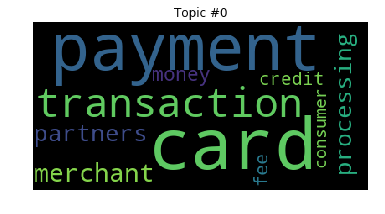

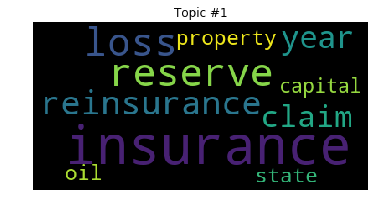

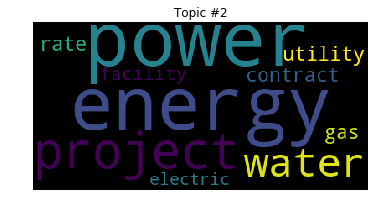

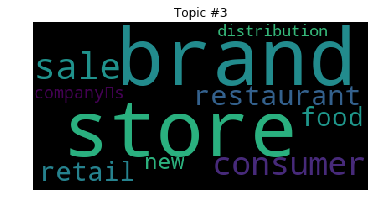

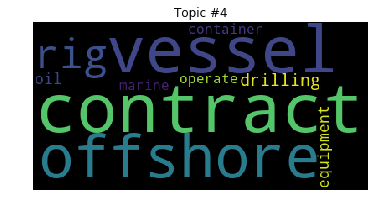

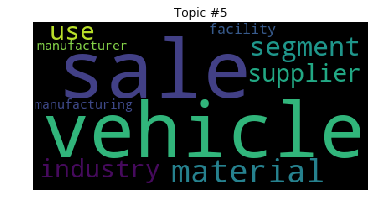

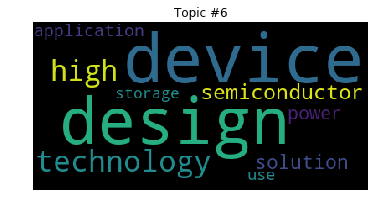

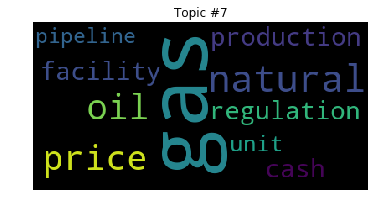

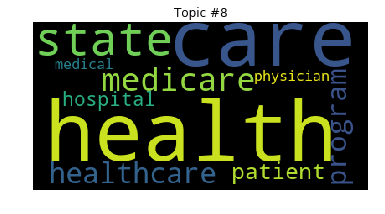

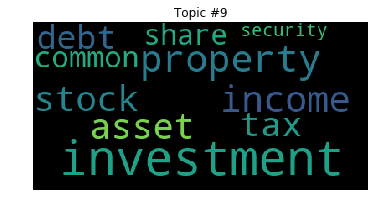

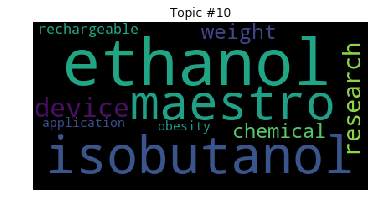

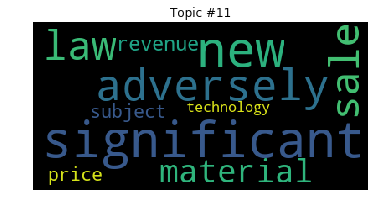

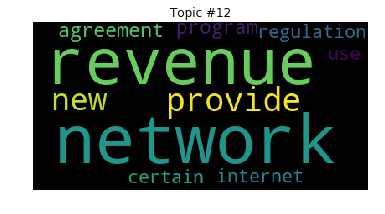

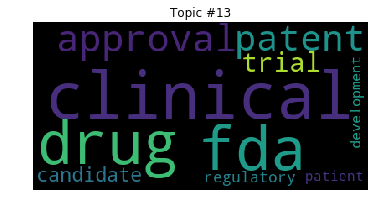

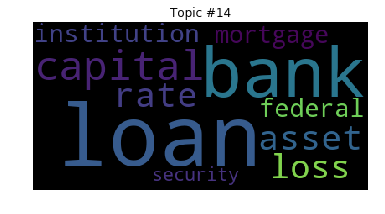

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [59]:
# visualize topics
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model, mycorpus, mydict, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/iriswang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
